# Proyecto Analítica Predictiva de Datos

## Importación de Datos

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import matplotlib.ticker as mticker
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

In [259]:
df = pd.read_csv("data_ventas.csv")
df.head(20)

,Unnamed: 0,link,referencia,latitud,longitud,direccion,distrito,etapa,fecha_entrega,financiamiento,areas_comunes,tipo,tipologia,piso,dormitorios,area,precio
0,9,https://nexoinmobiliario.pe/proyecto/venta-de-departamento-2706-high-line-santiago-de-surco-lima-lima-tribeca-inmobiliaria,HIGH LINE,-12.115975,-76.990975,Av. Caminos del Inca 508 esquina con Jr. Cañón del Pato,Santiago De Surco,En construcción,"31 de Diciembre, 2025",BBVA,"['Área de juegos para niños', 'Areas verdes', 'Ascensor directo', 'Gimnasio', 'Jardin de niños', 'Lobby', 'Piscina', 'Sala Bar', 'Salon Gourmet', 'Techos Ecológicos', 'Terraza', 'Zona de Parrillas']",flat,TIPO 10,Pisos: Entre 2 al 16,1,55.66 m2,"S/ 464,250"
1,3908,https://nexoinmobiliario.pe/proyecto/venta-de-departamento-2261-vista-marina-356-chorrillos-lima-lima-tale-inmobiliaria,VISTA MARINA 356,-12.159132,-77.024261,Malecón Costa Sur 356,Chorrillos,Entrega inmediata,"31 de Julio, 2024",Banco Scotiabank,"['Gimnasio', 'Lobby', 'Sala de Niños', 'Terraza']",flat,X05,Piso: 2,3,129.97 m2,"$ 346,000"
2,5827,https://nexoinmobiliario.pe/proyecto/venta-de-departamento-2037-pueblo-libre-pueblo-libre-lima-lima-ee-inmobiliaria,Pueblo Libre,-12.083753,-77.065885,Av. La Marina 449,Pueblo Libre,Entrega inmediata,"29 de Febrero, 2024",Banco BANBIF,['Lobby'],flat,701,Piso: 7,3,80.97 m2,"S/ 496,000"
3,4880,https://nexoinmobiliario.pe/proyecto/venta-de-departamento-3067-cosmos-miraflores-lima-lima-llosa-edificaciones-urban,COSMOS,-12.118554,-77.039877,óvalo julio ramon ribeyro,Miraflores,En planos,"30 de Julio, 2026",Financiamiento Propio,"['Gimnasio', 'Lobby', 'Sala Bar', 'Sala de Internet', 'Salon Gourmet', 'Terraza', 'Zona de Lavandería', 'Zona de Parrillas', 'Otros']",flat,15,Pisos: Entre 11 al 21,2,104.03 m2,"$ 322,389"
4,2194,https://nexoinmobiliario.pe/proyecto/venta-de-departamento-3325-edificio-sialia-jesus-maria-lima-lima-grupo-cygnus,Edificio Sialia,-12.073697,-77.046661,"Av. 6 de Agosto 1184, Jesús María",Jesus Maria,En planos,"31 de Mayo, 2027",Banco BCP,"['Jardin interior', 'Lobby', 'Sala de Internet', 'Sala de usos Múltiples', 'Terraza', 'Zona de Parrillas', 'Otros']",flat,Tipo 3,Pisos: Entre 2 al 16,2,48.95 m2,"S/ 335,993"
5,6297,https://nexoinmobiliario.pe/proyecto/venta-de-departamento-2841-botanika-jesus-maria-lima-lima-san-charbel-edificaciones,Botanika,-12.081009,-77.057121,Av. Garzón 2160,Jesus Maria,En construcción,"30 de Noviembre, 2025",Banco BCP,"['Área de juegos para niños', 'Gimnasio', 'Lobby', 'Piscina', 'Sala Bar', 'Sala de Niños', 'Sala de usos Múltiples', 'Terraza', 'Video vigilancia', 'Zona de Parrillas', 'Otros']",flat,TIPO 3,Piso: 3,1,29.40 m2,"S/ 230,000"
6,5773,https://nexoinmobiliario.pe/proyecto/venta-de-departamento-3337-vanderghen-400-miraflores-lima-lima-aurora-grupo-inmobiliario,Vanderghen 400,-12.109729,-77.040688,Av. Jorge Vanderghen 406,Miraflores,En planos,"01 de Junio, 2026",Banco Scotiabank,['Lobby'],duplex,PENTHOUSE 5,Piso: 9,2,142.00 m2,"$ 391,000"
7,4374,https://nexoinmobiliario.pe/proyecto/venta-de-departamento-3030-look-feel-etapa-2-santiago-de-surco-lima-lima-grupo-t&c,LOOK&FEEL - Etapa 2,-12.105015,-76.966286,Calle Aldebaran 178,Santiago De Surco,En planos,"31 de Marzo, 2026",Financiamiento Propio,"['Boulevard peatonal', 'Lobby', 'Piscina', 'Sala Bar', 'Sala de usos Múltiples', 'Salon Gourmet', 'Terraza', 'Zona de Parrillas']",flat,Tipo 9B,Piso: 1,1,92.84 m2,"S/ 586,036"
8,2664,https://nexoinmobiliario.pe/proyecto/venta-de-departamento-2698-hara-etapa-5-la-victoria-lima-lima-grupo-lar,Hara (Etapa 5),-12.081167,-77.012019,"Calle Fermin tanguis 160, La victoria",La Victoria,En construcción,"30 de Septiembre, 2025",Banco BANBIF,"['Área de juegos para niños', 'Gimnasio', 'Lobby', 'Sala de cine', 'Terraza', 'Video vigilancia', 'Zona de Lavandería', 'Zona de Parrillas', 'Otros']",flat,X01-C,Pisos: Entre 4 al 18,3,69.00 m2,"S/ 489,020"
9,1959,https://nexoinmobiliario.pe/proyecto/venta-de-departamento-3390-residencial-seiss-comas-lima-lima-lider,RESIDENCIAL SEISS,-11.

In [260]:
df.shape

(5463, 17)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5463 non-null   int64  
 1   link            5463 non-null   object 
 2   referencia      5463 non-null   object 
 3   latitud         5463 non-null   float64
 4   longitud        5463 non-null   float64
 5   direccion       5463 non-null   object 
 6   distrito        5463 non-null   object 
 7   etapa           5463 non-null   object 
 8   fecha_entrega   5463 non-null   object 
 9   financiamiento  5463 non-null   object 
 10  areas_comunes   5463 non-null   object 
 11  tipo            5463 non-null   object 
 12  tipologia       5463 non-null   object 
 13  piso            5463 non-null   object 
 14  dormitorios     5463 non-null   int64  
 15  area            5463 non-null   object 
 16  precio          5463 non-null   object 
dtypes: float64(2), int64(2), object(1

## Análisis Exploratorio

In [262]:
# Se identificaron las columnas más relevantes para el análisis de datos, las demás serán descartadas.
relevant_cols = ["distrito", "etapa", "financiamiento", "areas_comunes", "tipo", "dormitorios", "area", "precio"]
df = pd.DataFrame(df[relevant_cols])

In [263]:
for col in df.columns:
    if col in ["etapa", "tipo", "tipologia"]:
        num_unique = df[col].nunique()
        print(f"{col} tiene {num_unique} valores distintos")
        if num_unique < 10:
            print(set(df[col]))

etapa tiene 3 valores distintos
{'En construcción', 'Entrega inmediata', 'En planos'}
tipo tiene 2 valores distintos
{'flat', 'duplex'}


In [264]:
# Se considera que "etapa" y "tipo" son variables del tipo Factor, por lo que se hace la respectiva conversión.
df["etapa"] = pd.Categorical(df["etapa"], categories=["En planos", "En construcción", "Entrega inmediata"], ordered=True)
df["tipo"] = pd.Categorical(df["tipo"], categories=["flat", "duplex"], ordered=True)

In [265]:
# Se empieza a analizar valores nulos de las columnas del nuevo Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   distrito        5463 non-null   object  
 1   etapa           5463 non-null   category
 2   financiamiento  5463 non-null   object  
 3   areas_comunes   5463 non-null   object  
 4   tipo            5463 non-null   category
 5   dormitorios     5463 non-null   int64   
 6   area            5463 non-null   object  
 7   precio          5463 non-null   object  
dtypes: category(2), int64(1), object(5)
memory usage: 267.1+ KB


In [266]:
# Uniformizamos los valores de la columna objetivo a dólares
def convertiradolares(row):
    if row['moneda']=='PEN':
        return row['precio_float']/3.8
    else:
        return row['precio_float']


In [267]:
# Aplicamos las transformaciones para convertir la moneda y el área a valores float
df['precio_float']=df['precio'].str.replace('S/ ','').str.replace('$ ','').str.replace(',','').astype(float)
df['moneda'] = df['precio'].str.extract(r'(S/|\$)')[0].apply(lambda x: 'PEN' if 'S/' in x else 'USD')
df['precio_usd']=df.apply(convertiradolares, axis=1)

df['area_float']=df['area'].str.replace(' m2','').astype(float)


In [268]:
# Eliminamos estas columnas que fueron utilizadas
df = df.drop(["precio", "area", "precio_float", "moneda"], axis=1)
df.head(10)

,distrito,etapa,financiamiento,areas_comunes,tipo,dormitorios,precio_usd,area_float
0,Santiago De Surco,En construcción,BBVA,"['Área de juegos para niños', 'Areas verdes', 'Ascensor directo', 'Gimnasio', 'Jardin de niños', 'Lobby', 'Piscina', 'Sala Bar', 'Salon Gourmet', 'Techos Ecológicos', 'Terraza', 'Zona de Parrillas']",flat,1,122171.052632,55.66
1,Chorrillos,Entrega inmediata,Banco Scotiabank,"['Gimnasio', 'Lobby', 'Sala de Niños', 'Terraza']",flat,3,346000.000000,129.97
2,Pueblo Libre,Entrega inmediata,Banco BANBIF,['Lobby'],flat,3,130526.315789,80.97
3,Miraflores,En planos,Financiamiento Propio,"['Gimnasio', 'Lobby', 'Sala Bar', 'Sala de Internet', 'Salon Gourmet', 'Terraza', 'Zona de Lavandería', 'Zona de Parrillas', 'Otros']",flat,2,322389.000000,104.03
4,Jesus Maria,En planos,Banco BCP,"['Jardin interior', 'Lobby', 'Sala de Internet', 'Sala de usos Múltiples', 'Terraza', 'Zona de Parrillas', 'Otros']",flat,2,88419.210526,48.95
5,Jesus Maria,En construcción,Banco BCP,"['Área de juegos para niños', 'Gimnasio', 'Lobby', 'Piscina', 'Sala Bar', 'Sala de Niños', 'Sala de usos Múltiples', 'Terraza', 'Video vigilancia', 'Zona de Parrillas', 'Otros']",flat,1,60526.315789,29.40
6,Miraflores,En planos,Banco Scotiabank,['Lobby'],duplex,2,391000.000000,142.00
7,Santiago De Surco,En planos,Financiamiento Propio,"['Boulevard peatonal', 'Lobby', 'Piscina', 'Sala Bar', 'Sala de usos Múltiples', 'Salon Gourmet', 'Terraza', 'Zona de Parrillas']",flat,1,154220.000000,92.84
8,La Victoria,En construcción,Banco BANBIF,"['Área de juegos para niños', 'Gimnasio', 'Lobby', 'Sala de cine', 'Terraza', 'Video vigilancia', 'Zona de Lavandería', 'Zona de Parrillas', 'Otros']",flat,3,128689.473684,69.00
9,Comas,En planos,BBVA,"['Areas verdes', 'Boulevard peatonal', 'Cuarto servicio', 'Jardin interior', 'Lobby', 'Sala de usos Múltiples', 'Terraza', 'Zona de Parrillas', 'Otros']",flat,2,68078.947368,57.42


In [269]:
# Para la columna ¨Áreas comunes" vamos a realizar un One Hot Encoding para considerar
# como variables booleanas la presencia o ausencia de cada área común
def convert_to_list(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return []

In [270]:
df['areas_comunes'] = df['areas_comunes'].apply(convert_to_list)

In [271]:
one_hot_df = df.explode('areas_comunes')
one_hot_df = pd.get_dummies(one_hot_df, columns=['areas_comunes'])

one_hot_df = one_hot_df.groupby(level=0).max()
one_hot_df["etapa"] = one_hot_df["etapa"].cat.codes
one_hot_df["tipo"] = one_hot_df["tipo"].cat.codes
one_hot_df

,distrito,etapa,financiamiento,tipo,dormitorios,precio_usd,area_float,areas_comunes_Areas verdes,areas_comunes_Ascensor directo,areas_comunes_Boulevard peatonal,...,areas_comunes_Sala de usos Múltiples,areas_comunes_Salon Gourmet,areas_comunes_Sauna,areas_comunes_Techo Panorámico,areas_comunes_Techos Ecológicos,areas_comunes_Terraza,areas_comunes_Video vigilancia,areas_comunes_Zona de Lavandería,areas_comunes_Zona de Parrillas,areas_comunes_Área de juegos para niños
0,Santiago De Surco,1,BBVA,0,1,122171.052632,55.66,True,True,False,...,False,True,False,False,True,True,False,False,True,True
1,Chorrillos,2,Banco Scotiabank,0,3,346000.000000,129.97,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,Pueblo Libre,2,Banco BANBIF,0,3,130526.315789,80.97,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Miraflores,0,Financiamiento Propio,0,2,322389.000000,104.03,False,False,False,...,False,True,False,False,False,True,False,True,True,False
4,Jesus Maria,0,Banco BCP,0,2,88419.210526,48.95,False,False,False,...,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458,La Victoria,1,Banco Interbank,0,1,62250.526316,34.09,False,False,False,...,True,False,False,True,False,True,False,True,True,True
5459,San Miguel,0,Banco BCP,0,3,100210.526316,71.00,False,False,False,...,False,False,False,False,False,True,False,False,True,False
5460,Surquillo,0,Banco BCP,0,2,171868.421053,94.55,True,False,False,...,True,False,False,False,False,True,True,True,True,True
5461,Miraflores,1,Banco BCP,0,2,108458.947368,61.80,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [272]:
one_hot_df["financiamiento"] = one_hot_df["financiamiento"].astype(str).apply(lambda x: [item.strip() for item in x.split(",")])

In [273]:
one_hot_df = one_hot_df.explode("financiamiento")
one_hot_df = pd.get_dummies(one_hot_df, columns=["financiamiento"])
one_hot_df = one_hot_df.groupby(level=0).max()
one_hot_df

,distrito,etapa,tipo,dormitorios,precio_usd,area_float,areas_comunes_Areas verdes,areas_comunes_Ascensor directo,areas_comunes_Boulevard peatonal,areas_comunes_Cancha de Fulbito,...,financiamiento_BBVA,financiamiento_Banco BANBIF,financiamiento_Banco BCP,financiamiento_Banco GNB,financiamiento_Banco Interbank,financiamiento_Banco Pichincha,financiamiento_Banco Scotiabank,financiamiento_Banco de Comercio,financiamiento_Financiamiento Propio,financiamiento_Otros
0,Santiago De Surco,1,0,1,122171.052632,55.66,True,True,False,False,...,True,False,False,False,False,False,False,False,False,False
1,Chorrillos,2,0,3,346000.000000,129.97,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,Pueblo Libre,2,0,3,130526.315789,80.97,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,Miraflores,0,0,2,322389.000000,104.03,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,Jesus Maria,0,0,2,88419.210526,48.95,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458,La Victoria,1,0,1,62250.526316,34.09,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5459,San Miguel,0,0,3,100210.526316,71.00,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
5460,Surquillo,0,0,2,171868.421053,94.55,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
5461,Miraflores,1,0,2,108458.947368,61.80,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


## Transformación de variables

En este caso se van a analizar las variables float de area y precio para ver si es necesaria una transformación.

### Precio

Text(0.5, 1.0, 'Boxplot de Precios de las Propiedades')

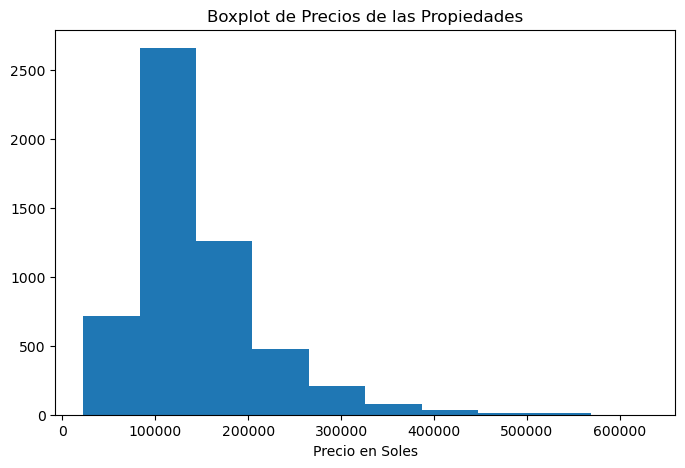

In [274]:
target = df['precio_usd']
plt.figure(figsize=(8, 5))
plt.hist(target)
plt.xlabel('Precio en Soles')
plt.title('Boxplot de Precios de las Propiedades')

Text(0.5, 1.0, 'Boxplot de Precios de las Propiedades')

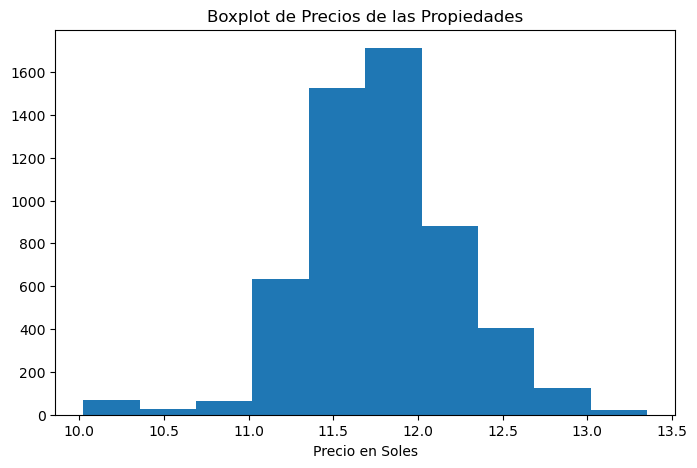

In [275]:
# Se realizará una transformación logarítmica
target = df['precio_usd']
plt.figure(figsize=(8, 5))
plt.hist(np.log(target))
plt.xlabel('Precio en Soles')
plt.title('Boxplot de Precios de las Propiedades')

### Area

Text(0.5, 1.0, 'Boxplot de Precios de las Propiedades')

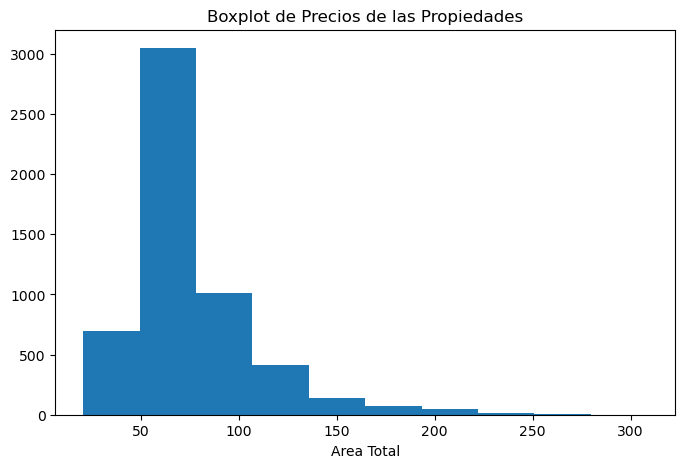

In [276]:
feat = df['area_float']
plt.figure(figsize=(8, 5))
plt.hist(feat)
plt.xlabel('Area Total')
plt.title('Boxplot de Precios de las Propiedades')

Text(0.5, 1.0, 'Boxplot de Precios de las Propiedades')

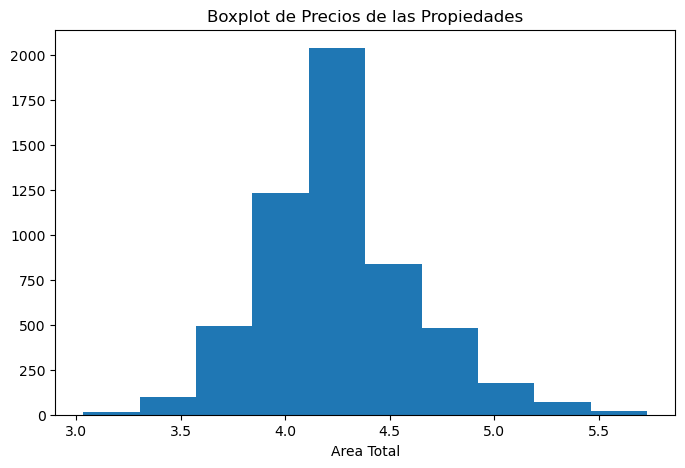

In [277]:
# Se realizará una transformación logarítmica
feat = df['area_float']
plt.figure(figsize=(8, 5))
plt.hist(np.log(feat))
plt.xlabel('Area Total')
plt.title('Boxplot de Precios de las Propiedades')

In [278]:
# Transformaciones aplicadas en el df

one_hot_df["precio_usd"] = np.log(one_hot_df["precio_usd"] )
one_hot_df["area_float"] = np.log(one_hot_df["area_float"])

In [279]:
# Para entrenar el modelo, se convertirán las variables categóricas en numéricas.
categorical_columns = ['distrito']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    one_hot_df[col] = le.fit_transform(one_hot_df[col])
    label_encoders[col] = le

### Train-test split

In [280]:
X=one_hot_df.drop("precio_usd", axis=1)
Y=one_hot_df['precio_usd']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3,random_state=42)

# Modelo 1 - Regresión Lineal

In [281]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, Y_train)

Y_pred = model.predict(X_test_scaled)

In [282]:
# Como el modelo está entrenado con el target transformado por log, se tiene que invertir la operación
Y_pred_original = np.exp(Y_pred)
Y_test_original = np.exp(Y_test)

### Métricas

In [283]:
rmse = np.sqrt(mean_squared_error(Y_test_original, Y_pred_original))
mse = mean_squared_error(Y_test_original, Y_pred_original)
mae = mean_absolute_error(Y_test_original, Y_pred_original)
r2 = r2_score(Y_test_original, Y_pred_original)

print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")


RMSE: 32864.22
MSE: 1080056933.82
MAE: 22297.82
R²: 0.7559


Text(0, 0.5, 'Precio')

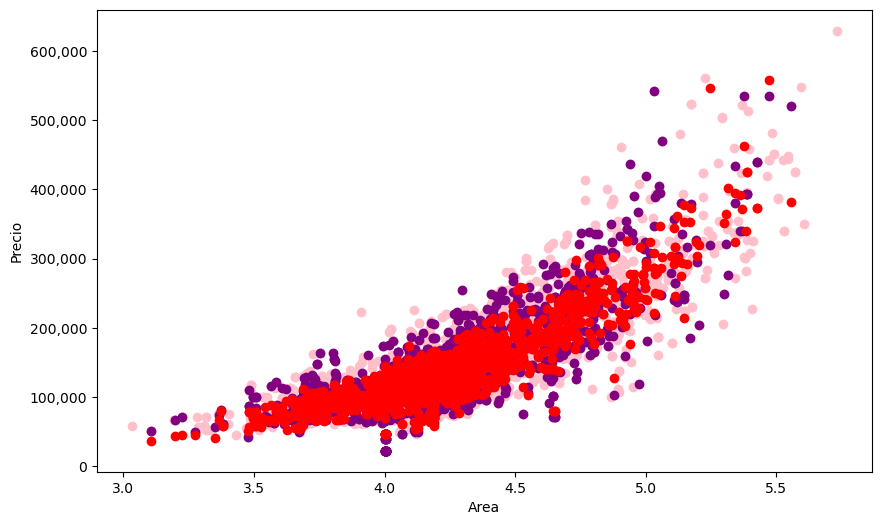

In [284]:
plt.figure(figsize=(10, 6))
plt.scatter(one_hot_df['area_float'], np.exp(one_hot_df['precio_usd']), color='pink')
plt.scatter(X_test["area_float"], Y_test_original, color='purple')
plt.scatter(X_test["area_float"], Y_pred_original, color='red')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Area')
plt.ylabel('Precio')

### Variables más importantes y sus coeficientes

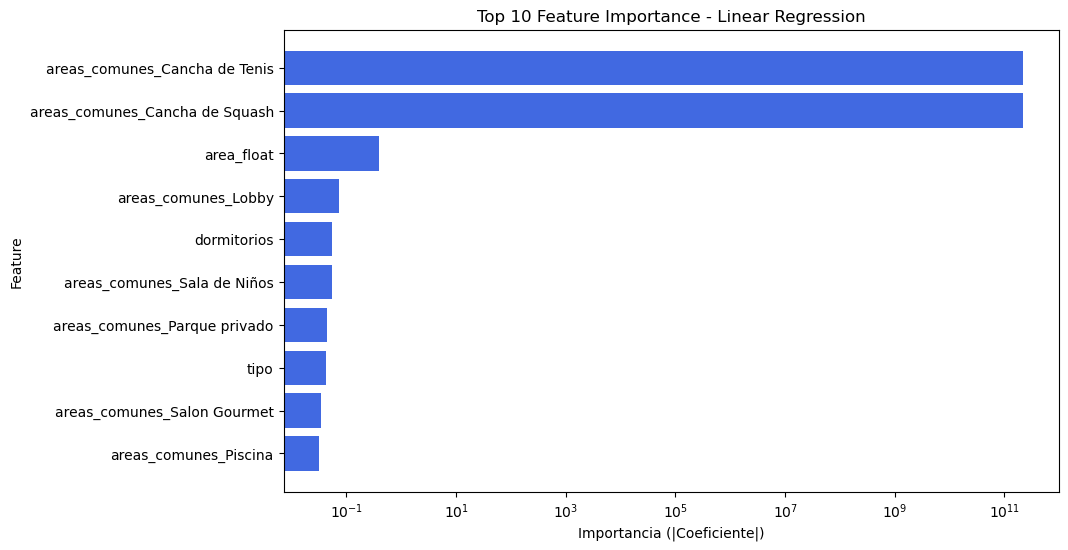

In [285]:
importance = np.abs(model.coef_)

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='royalblue')
plt.xlabel('Importancia (|Coeficiente|)')
plt.ylabel('Feature')
plt.xscale('log')
plt.title('Top 10 Feature Importance - Linear Regression')
plt.gca().invert_yaxis()
plt.show()

In [286]:
one_hot_df[["areas_comunes_Cancha de Squash", "areas_comunes_Cancha de Tenis"]].corr()

,areas_comunes_Cancha de Squash,areas_comunes_Cancha de Tenis
areas_comunes_Cancha de Squash,1.0,1.0
areas_comunes_Cancha de Tenis,1.0,1.0


In [287]:
one_hot_df.drop(columns=["areas_comunes_Cancha de Squash"], inplace=True)

RMSE: 32865.28
MSE: 1080126645.38
MAE: 22297.73
R²: 0.7558


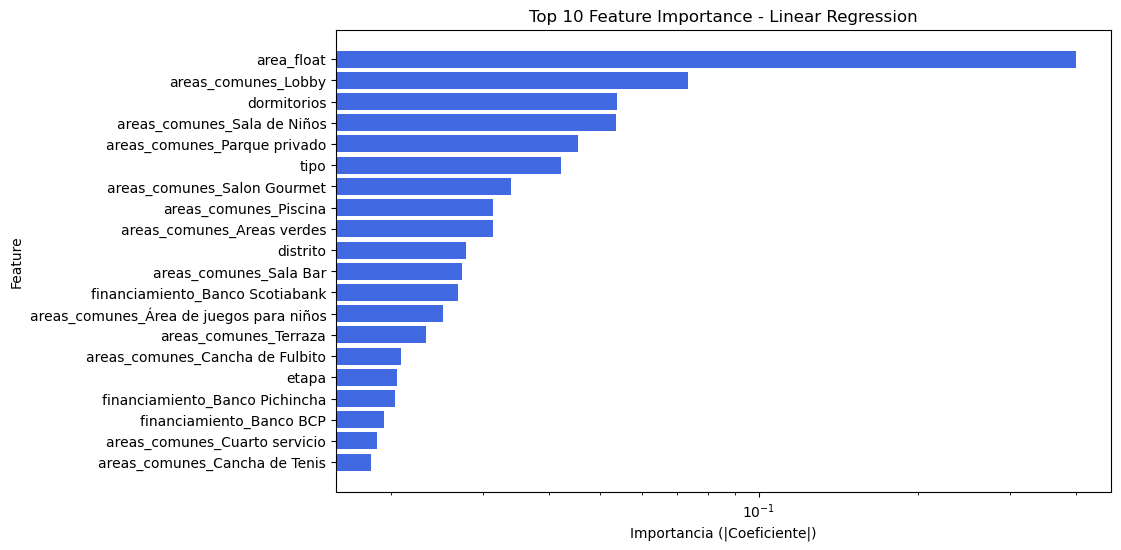

In [288]:
X=one_hot_df.drop("precio_usd", axis=1)
Y=one_hot_df['precio_usd']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, Y_train)

Y_pred = model.predict(X_test_scaled)

Y_pred_original = np.exp(Y_pred)
Y_test_original = np.exp(Y_test)

### Métricas
rmse = np.sqrt(mean_squared_error(Y_test_original, Y_pred_original))
mse = mean_squared_error(Y_test_original, Y_pred_original)
mae = mean_absolute_error(Y_test_original, Y_pred_original)
r2 = r2_score(Y_test_original, Y_pred_original)

print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

importance = np.abs(model.coef_)

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='royalblue')
plt.xlabel('Importancia (|Coeficiente|)')
plt.ylabel('Feature')
plt.xscale('log')
plt.title('Top 10 Feature Importance - Linear Regression')
plt.gca().invert_yaxis()
plt.show()

# Modelo 2 (XGBoost)


In [289]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [290]:
# Para entrenar este modelo, se utilizará una validación cruzada de parámetros

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
}

In [291]:
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, Y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.7, 0.9, 1.0]},
             scoring='r2', verbose=1)

In [292]:
best_model = grid_search.best_estimator_


In [293]:
y_pred = best_model.predict(X_test_scaled)

In [294]:
y_pred_original = np.exp(y_pred)

mae = mean_absolute_error(Y_test_original, y_pred_original)
mse = mean_squared_error(Y_test_original, y_pred_original)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test_original, y_pred_original)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 6650.3487
MSE: 166220093.3285
RMSE: 12892.6372
R²: 0.9624


Text(0, 0.5, 'Precio')

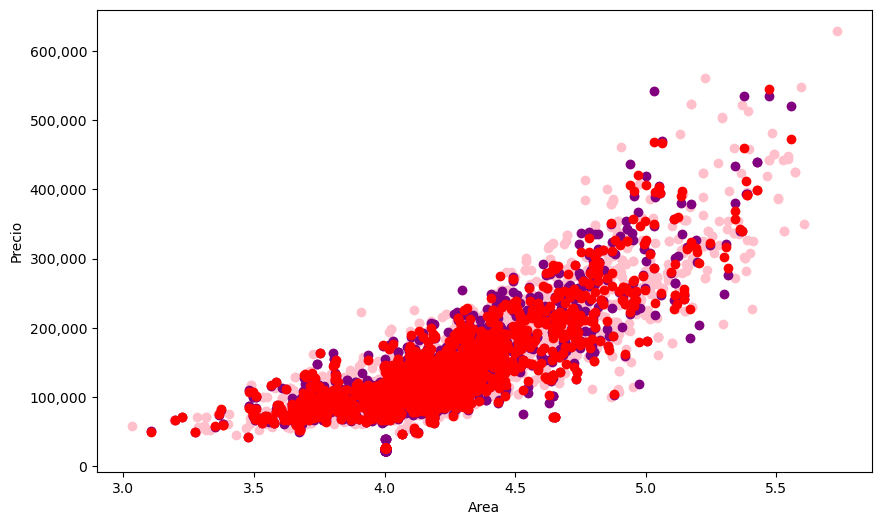

In [295]:
plt.figure(figsize=(10, 6))
plt.scatter(one_hot_df['area_float'], np.exp(one_hot_df['precio_usd']), color='pink')
plt.scatter(X_test["area_float"], Y_test_original, color='purple')
plt.scatter(X_test["area_float"], y_pred_original, color='red')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Area')
plt.ylabel('Precio')

### Importancia de variables

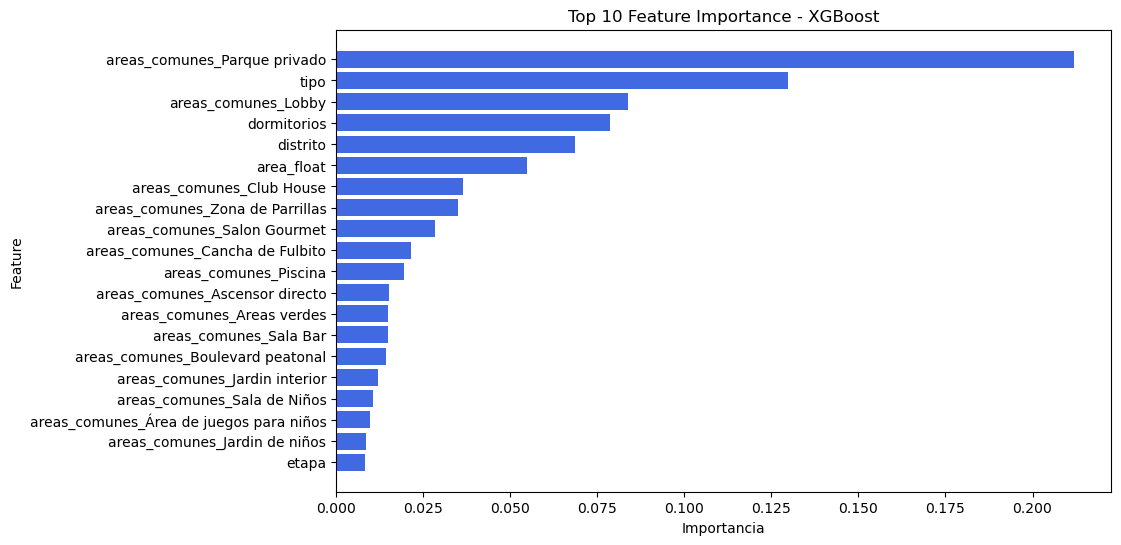

In [296]:
feature_importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='royalblue')
plt.xlabel('Importancia')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance - XGBoost')
plt.gca().invert_yaxis()
plt.show()

# Modelo 3 (?)